# 1.	Scrape this medium article (https://towardsdatascience.com/data-science-and-machine-learning-interview-questions-3f6207cf040b) and create a word cloud to visualize frequently used words 

(Note: Select all paragraphs and join them together as a single string and pass it to python word cloud package)


In [2]:
#imports
from selenium import webdriver
browser = webdriver.Chrome('chromedriver.exe')

In [3]:
url='https://towardsdatascience.com/data-science-and-machine-learning-interview-questions-3f6207cf040b?gi=2ab9cc98d13'
browser.get(url)

In [4]:
#imports
import pandas as pd
import bs4

In [5]:
div_tag = browser.find_element_by_css_selector('div')
para_tags= div_tag.find_elements_by_css_selector('p')
len(para_tags)

13

In [6]:
sentences=''
for para in para_tags:
    para_text= para.get_attribute('innerHTML')
    sentences= sentences+' '+ para_text
    sentences=bs4.BeautifulSoup(sentences,'html.parser').text

In [111]:
sentences[:80]

' Ah the dreaded machine learning interview. You feel like you know everything… u'

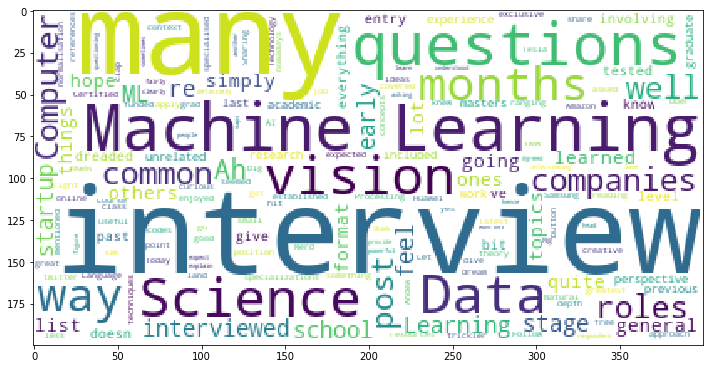

In [11]:
#wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
wc= WordCloud(background_color='white').generate(''.join(sentences))
plt.imshow(wc)

# 2.	Using amazon reviews data set do the following

In [9]:
#reading the data
amazon = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/amazon_reviews.csv')
amazon.shape

(999, 10)

In [10]:
amazon.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09
1,1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09
2,2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1.283990e+09
3,3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1.290557e+09
4,4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1.317254e+09


### a.	create a corpus using sklearn package. 

##### Cleaning the text

In [12]:
docs = amazon['reviewText'].fillna('').str.lower().str.replace('[^a-z ]','')
docs.head()

0    we got this gps for my husband who is an otr o...
1    im a professional otr truck driver and i bough...
2    well what can i say  ive had this unit in my t...
3    not going to write a long review even thought ...
4    ive had mine for a year and heres what we got ...
Name: reviewText, dtype: object

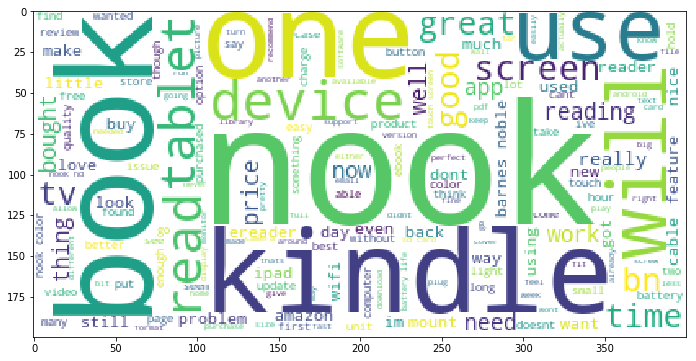

In [13]:
from wordcloud import WordCloud
wc=WordCloud(background_color='white').generate(' '.join(docs))
plt.figure(figsize=(14,6))
plt.imshow(wc)
plt.show()

#### Creating junk and stop words

In [14]:
import nltk
#nltk.download('stopwords')

stop_words= nltk.corpus.stopwords.words('english')

junk_words= ['amp','rt','https','will']
#len(stop_words)

stop_words.extend(junk_words)
len(stop_words)

183

#### removing junk ,stop words from the reviews

In [15]:
def clean_text(row):
    row_words = row.split(' ')
    clean_words = [word for word in row_words if word not in stop_words]
    return ' '.join(clean_words)
docs_clean= docs.apply(clean_text)
docs_clean.head()

0    got gps husband otr road trucker  impressed sh...
1    im professional otr truck driver bought tnd  t...
2    well say  ive unit truck four days  prior garm...
3    going write long review even thought unit dese...
4    ive mine year heres got tries route non truck ...
Name: reviewText, dtype: object

### b.	Create the Document Term Matrix using unigrams

In [16]:
#import
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
cv=CountVectorizer(ngram_range=(1,1))   #since unigram
sparse_martix= cv.fit_transform(docs_clean)
numpy_matrix= sparse_martix.toarray()
df_dtm = pd.DataFrame(numpy_matrix, columns= cv.get_feature_names())
df_dtm.shape

(999, 9438)

In [18]:
df_dtm.head()  ##Sparse matrix

,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,absence,...,zillions,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### c.	Identify top 25 unigrams and filter their respective columns from DTM

<Figure size 864x720 with 0 Axes>

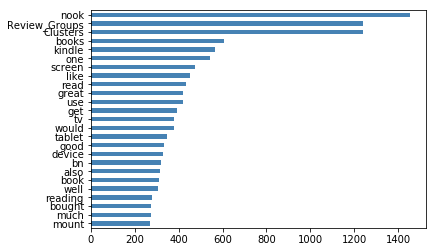

<Figure size 864x720 with 0 Axes>

In [106]:
df_dtm.sum().sort_values(ascending= False ).head(25)[::-1].plot.barh(color= 'steelblue')

In [20]:
frequent_words = df_dtm.sum().sort_values(ascending= False).head(25).index
frequent_words

Index(['nook', 'books', 'kindle', 'one', 'screen', 'like', 'read', 'great',
       'use', 'get', 'tv', 'would', 'tablet', 'good', 'device', 'bn', 'also',
       'book', 'well', 'reading', 'bought', 'much', 'mount', 'dont', 'works'],
      dtype='object')

- lets create dataframe using top frequent words as features

In [108]:
df=df_dtm[['nook', 'books', 'kindle', 'one', 'screen', 'like', 'read', 'great',
       'use', 'get', 'tv', 'would', 'tablet', 'good', 'device', 'bn', 'also',
       'book', 'well', 'reading', 'bought', 'much', 'mount', 'dont', 'works']]
df.head()

,nook,books,kindle,one,screen,like,read,great,use,get,...,bn,also,book,well,reading,bought,much,mount,dont,works
0,0,0,0,1,1,0,0,2,2,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,5,2,5,0,0,2,1,...,0,4,0,2,0,0,0,0,1,0
3,0,0,0,1,1,1,0,1,0,2,...,0,2,0,1,0,1,0,0,0,0
4,0,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
df.shape

(999, 25)

### d.	Using these 25 columns, compute correlation matrix (if possible visualize the same using seaborn heatmap function). 

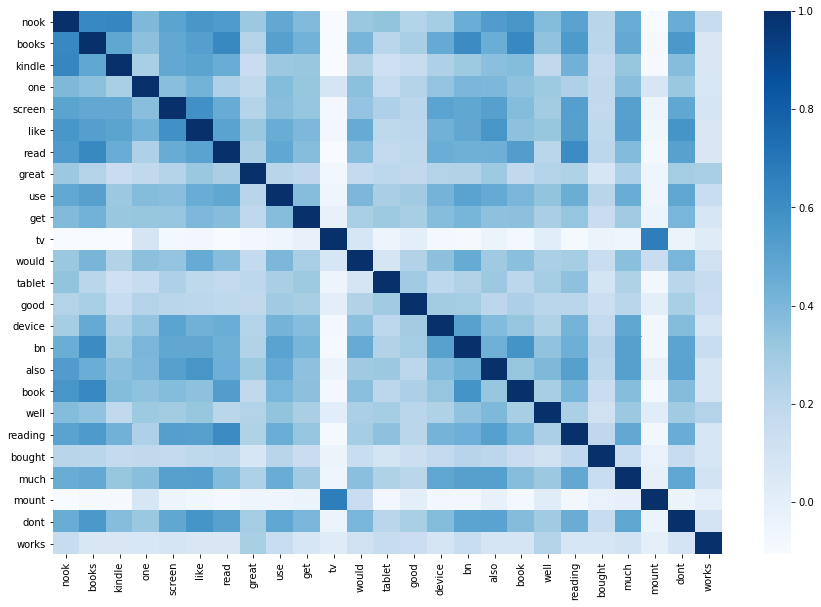

In [22]:
words_correlation = df_dtm[frequent_words].corr()
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(words_correlation, cmap='Blues')

### e.	Using correlation matrix, Identify the pair of unigrams which has the highest correlation value

In [24]:
#Correlation_matrix
words_correlation.corr()

,nook,books,kindle,one,screen,like,read,great,use,get,...,bn,also,book,well,reading,bought,much,mount,dont,works
nook,1.000000,0.832652,0.850366,0.432493,0.715780,0.771263,0.771665,0.314940,0.663960,0.541758,...,0.646740,0.729429,0.767241,0.399936,0.748677,0.156561,0.633195,-0.724700,0.674484,-0.142972
books,0.832652,1.000000,0.725889,0.439679,0.724762,0.764471,0.867490,0.211076,0.750399,0.610147,...,0.831741,0.665896,0.860862,0.347544,0.782257,0.169392,0.692119,-0.683109,0.785558,-0.266469
kindle,0.850366,0.725889,1.000000,0.333985,0.708101,0.729778,0.711647,0.139304,0.501443,0.473092,...,0.505610,0.577691,0.615478,0.171578,0.679085,0.163096,0.520315,-0.601107,0.595862,-0.230734
one,0.432493,0.439679,0.333985,1.000000,0.454806,0.523853,0.303456,0.066239,0.464994,0.381796,...,0.509540,0.479395,0.421491,0.305605,0.280390,0.089881,0.469649,-0.313204,0.404402,-0.274237
screen,0.715780,0.724762,0.708101,0.454806,1.000000,0.834897,0.709821,0.230001,0.584830,0.489355,...,0.697339,0.752341,0.583576,0.301126,0.772899,0.133334,0.762205,-0.624570,0.728711,-0.257302
like,0.771263,0.764471,0.729778,0.523853,0.834897,1.000000,0.749259,0.329646,0.674151,0.552401,...,0.697586,0.803296,0.574826,0.344513,0.755193,0.142011,0.764495,-0.628682,0.816144,-0.273155
read,0.771665,0.867490,0.711647,0.303456,0.709821,0.749259,1.000000,0.261871,0.704330,0.543077,...,0.684494,0.655757,0.762773,0.193268,0.845016,0.177658,0.617372,-0.655534,0.753383,-0.262777
great,0.314940,0.211076,0.139304,0.066239,0.230001,0.329646,0.261871,1.000000,0.206250,0.146964,...,0.218690,0.337776,0.155603,0.232258,0.254906,-0.087959,0.263305,-0.486528,0.300755,0.256351
use,0.663960,0.750399,0.501443,0.464994,0.584830,0.674151,0.704330,0.206250,1.000000,0.538905,...,0.740103,0.667826,0.632683,0.386063,0.664346,0.172421,0.672324,-0.642147,0.717798,-0.133935
get,0.541758,0.610147,0.473092,0.381796,0.489355,0.552401,0.543077,0.146964,0.538905,1.000000,...,0.582485,0.494591,0.529951,0.262185,0.499173,0.069206,0.436170,-0.572394,0.578719,-0.228915


In [23]:
d = words_correlation.unstack()
sort = d.sort_values(kind="quicksort",ascending=False)

In [24]:
sort=pd.DataFrame(sort)

In [ ]:
#lest see which words are more correlated

In [25]:
#highest correlated words
sort[25:].head()

,,0
tv,mount,0.670188
mount,tv,0.670188
nook,kindle,0.635081
kindle,nook,0.635081
books,book,0.626593


#### Read and books are highest correlated words

# 3.	Using the above Document Term Matrix

### a.	Use K-means clustering to cluster the reviews in to four groups

In [26]:
df_dtm.head()

,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,absence,...,zillions,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#imports
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [28]:
## Identify the optimal number of clusters 
# elbow method
cluster_range = range( 1,10)
cluster_wss = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(df_dtm)
    cluster_wss.append( clusters.inertia_ )
from collections import OrderedDict
clusters_df = pd.DataFrame( OrderedDict ( 
        {"num_clusters": cluster_range, 
        "cluster_wss": cluster_wss }
        ) )
clusters_df[0:10]

,num_clusters,cluster_wss
0,1,140615.811812
1,2,120764.206906
2,3,114545.810069
3,4,111271.186835
4,5,109089.290630
5,6,107380.570806
6,7,105741.966267
7,8,104424.013707
8,9,102983.905550


- lets plot elbow plot to identify the optimum k

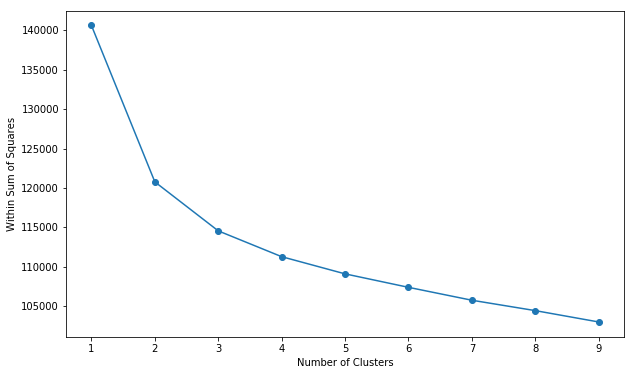

In [29]:
plt.figure(figsize=(10,6))
plt.xlabel('Number of Clusters')
plt.ylabel('Within Sum of Squares')
plt.xticks(np.arange(min(clusters_df.num_clusters), 
                     max(clusters_df.num_clusters)+1, 
                     1.0))
plt.plot( clusters_df.num_clusters, 
         clusters_df.cluster_wss, 
         marker = "o" )    ### take k =4

In [30]:
## Profiling the clusters
cluster = KMeans(n_clusters=4, random_state=10)
cluster_labels = cluster.fit_predict(df_dtm)
cluster_labels
df_dtm['Clusters'] = cluster_labels

clus_profile = df_dtm.groupby(['Clusters'],
                       as_index=False).mean()
clus_profile   

,Clusters,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,...,zillions,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune
0,0,0.000000,0.000000,0.000000,0.111111,0.666667,1.444444,0.000000,0.000000,0.000000,...,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0.444444,0.333333,0.000000,0.000000
1,1,0.000000,0.000000,0.001166,0.001166,0.025641,0.058275,0.000000,0.000000,0.000000,...,0.001166,0.001166,0.001166,0.000000,0.000000,0.000000,0.001166,0.000000,0.001166,0.001166
2,2,0.000000,0.000000,0.000000,0.000000,0.500000,0.666667,0.000000,0.083333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333
3,3,0.008333,0.008333,0.000000,0.016667,0.191667,0.516667,0.008333,0.000000,0.008333,...,0.000000,0.008333,0.000000,0.000000,0.016667,0.008333,0.050000,0.000000,0.000000,0.000000


### b.	Plot a bar chart to display no. of documents under each group

In [31]:
clus_profile

,Clusters,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,...,zillions,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune
0,0,0.000000,0.000000,0.000000,0.111111,0.666667,1.444444,0.000000,0.000000,0.000000,...,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0.444444,0.333333,0.000000,0.000000
1,1,0.000000,0.000000,0.001166,0.001166,0.025641,0.058275,0.000000,0.000000,0.000000,...,0.001166,0.001166,0.001166,0.000000,0.000000,0.000000,0.001166,0.000000,0.001166,0.001166
2,2,0.000000,0.000000,0.000000,0.000000,0.500000,0.666667,0.000000,0.083333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333
3,3,0.008333,0.008333,0.000000,0.016667,0.191667,0.516667,0.008333,0.000000,0.008333,...,0.000000,0.008333,0.000000,0.000000,0.016667,0.008333,0.050000,0.000000,0.000000,0.000000


In [32]:
df_dtm['Review_Groups']= cluster.labels_

In [33]:
df_dtm.head()

,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,absence,...,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune,Clusters,Review_Groups
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


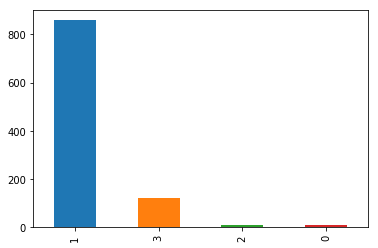

In [34]:
#bar plot for cluster ID
df_dtm['Review_Groups'].value_counts().plot(kind='bar')

### c.	Create Word cloud for each group  (for each group)

In [35]:
#lets create word cloud function
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=100 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [36]:
#dividing individual group

In [37]:
dtm_0=df_dtm[df_dtm['Review_Groups']==0]
print(dtm_0.shape)

dtm_1=df_dtm[df_dtm['Review_Groups']==1]
print(dtm_1.shape)


dtm_2=df_dtm[df_dtm['Review_Groups']==2]
print(dtm_2.shape)


dtm_3=df_dtm[df_dtm['Review_Groups']==3]
print(dtm_3.shape)

(9, 9440)
(858, 9440)
(12, 9440)
(120, 9440)


#### word cloud for cluster 0

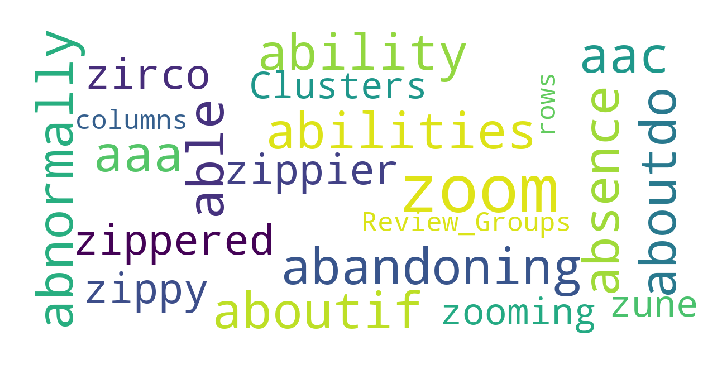

In [38]:
show_wordcloud(dtm_0)

#### word cloud for cluster id 1

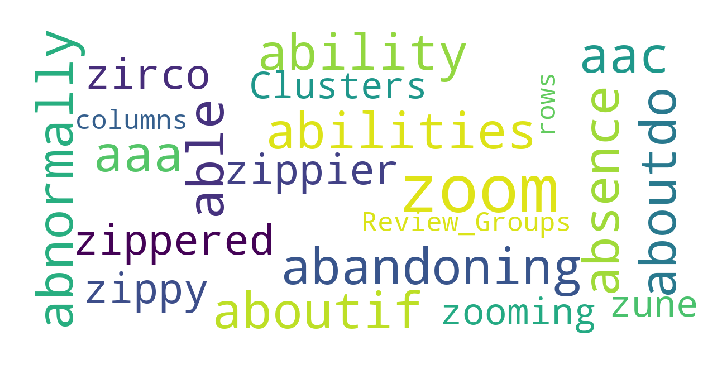

In [39]:
show_wordcloud(dtm_1)

#### Word cloud for cluster id 2

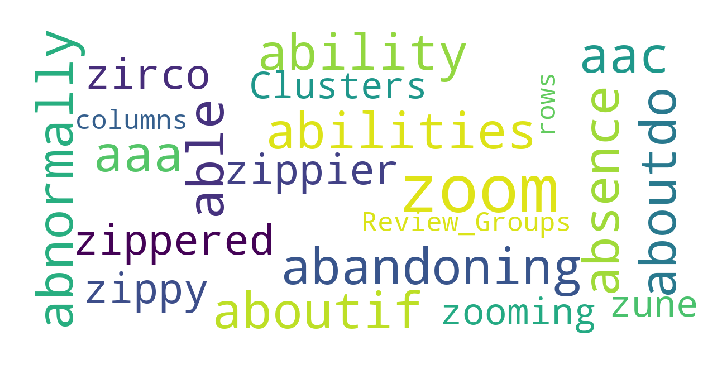

In [40]:
show_wordcloud(dtm_2)

#### Word cloud for cluster id 3

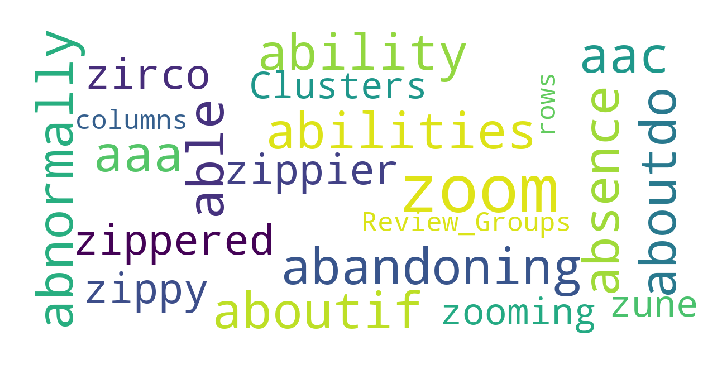

In [41]:
show_wordcloud(dtm_3)

# 4.	Using imdb movies reviews data set (imdb_sentiment.csv: https://bit.ly/2S2yXEd), create a supervised model to predict the sentiment of user reviews.

In [42]:
#reading data
imdb=pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/imdb_sentiment.csv')
imdb.shape

(748, 2)

In [43]:
imdb.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [44]:
imdb.sentiment.unique()

array([0, 1], dtype=int64)

### a.	Create a word cloud using the user reviews

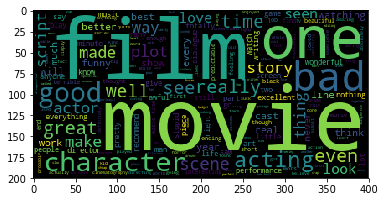

In [45]:
wc= WordCloud().generate(' '.join(imdb['review']))
plt.imshow(wc)

### b.	Use random_state=100 while splitting data in to training (80%) and testing(20%).

#### Cleaning the docs

In [46]:
#creating junk and stop words
nltk.corpus.stopwords.words('english')
stop_words=nltk.corpus.stopwords.words('english')
junk_words=["amp",'rt','https','will']
len(stop_words)
stop_words.extend(junk_words)
len(stop_words)

183

In [47]:
#using stem function to remove ing,ed.. etc
stemmer=nltk.PorterStemmer()
def clean_text(row_text):
    #print(type(row_text))
    row_words=row_text.split(' ')
    #print(row_words)
    row_words= [stemmer.stem(word) for word in row_words if word not in stop_words]
    #print(row_words)
    #print('----')
    return ' '.join(row_words)

In [48]:
#import
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
cv= CountVectorizer()
stemmer=nltk.PorterStemmer()
docs=imdb['review'].fillna('').str.lower().str.replace('[^a-z ]','')
docs_clean=docs.apply(lambda v:' '.join([stemmer.stem(word) for word in v.split(' ') if word not in stop_words]))

#### Train Test split (80:20)

In [50]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(docs_clean,test_size=0.2,random_state=100)

In [51]:
cv=CountVectorizer()
cv.fit(train)
train_x=cv.transform(train)
test_x=cv.transform(test)

In [52]:
train_y=imdb.loc[train.index]['sentiment']
test_y=imdb.loc[test.index]['sentiment']

### d.	Build various supervised classification models using the training data set

### Random Forest Classifier

In [53]:
#imports
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [54]:
adaboost_model=RandomForestClassifier(n_estimators=300,random_state=100)
adaboost_model.fit(train_x,train_y)
pred_class=adaboost_model.predict(test_x)
accuracy=accuracy_score(test_y,pred_class)

In [55]:
accuracy

0.7

### Logestic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_x,train_y)
pred_class=lr.predict(test_x)
accuracy1=accuracy_score(test_y,pred_class)

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
accuracy1

0.7533333333333333

### Decision Tree Classifier

In [58]:
DTClassifier= DecisionTreeClassifier (max_depth=5, min_samples_split =3,criterion='gini')
DTClassifier.fit(train_x,train_y)
predicted_labels = DTClassifier.predict(test_x)
accuracy3= accuracy_score(test_y, predicted_labels)

In [59]:
accuracy3

0.5266666666666666

### KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(train_x,train_y)
pred_class=knn.predict(test_x)
accuracy4=accuracy_score(test_y,pred_class)

In [61]:
accuracy4

0.66

### e.	Predict and compute accuracy of the model on test data set
### f.	Identify which model is best for sentiment prediction

In [105]:
pd.DataFrame({'model':['RandomForestClassifier','LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier'],'accuracy':[accuracy,accuracy1,accuracy3,accuracy4]})

,model,accuracy
0,RandomForestClassifier,0.700000
1,LogisticRegression,0.753333
2,DecisionTreeClassifier,0.526667
3,KNeighborsClassifier,0.660000


In [63]:
##Logestic regression is the best model

### c.	Comment if the target variable contains balanced or imbalanced classes (In target variable: 0 = negative, 1 = positive sentiment)

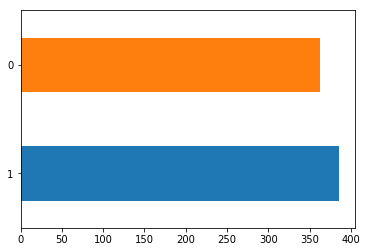

In [64]:
imdb.sentiment.value_counts().plot(kind="barh",rot = 0)

#### Sentiment feature is almost balanced with postive and negative ratings

# 5.	Identify sentiment for the imdb user reviews using vader package. Comment the performance of supervised vs unsupervised sentiment prediction.

### Unsupervised approach

In [65]:
#creating function
%matplotlib inline
def get_sentiment_score(review):
    compound_score=senti.polarity_scores(review)['compound']
    return compound_score

def get_sentiment(score):
    if score>0:
        return 'Positive'
    elif score<0:
        return 'Negative'
    else :
        return 'Positive'

In [66]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

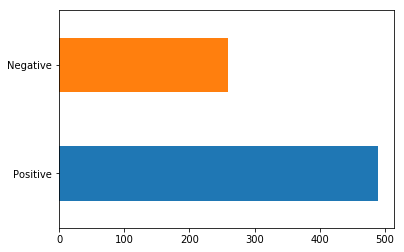

In [67]:
senti=SentimentIntensityAnalyzer()
imdb['sentiment_scores']=imdb['review'].apply(get_sentiment_score)
imdb['sentiment_vader']=imdb['sentiment_scores'].apply(get_sentiment)
#hotstar['sentiment_scores'].plot.hist()
imdb['sentiment_vader'].value_counts().plot.barh()

In [68]:
imdb['sentiment_vader'].replace(['Negative','Positive'],[0,1],inplace=True)

In [69]:
imdb.head()

,review,sentiment,sentiment_scores,sentiment_vader
0,"A very, very, very slow-moving, aimless movie ...",0,-0.4215,0
1,Not sure who was more lost - the flat characte...,0,-0.5507,0
2,Attempting artiness with black & white and cle...,0,-0.7178,0
3,Very little music or anything to speak of.,0,0.0000,1
4,The best scene in the movie was when Gerardo i...,1,0.6369,1


### supervised semtiment analysis

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
stop_words=nltk.corpus.stopwords.words('english')
stop_words=list(np.setdiff1d(stop_words,['not']))
junk_words=[]
len(stop_words)
stop_words.extend(junk_words)
len(stop_words)

178

In [72]:
docs=imdb['review'].fillna('').str.lower().str.replace('[^a-z ]','')
docs.head()

0    a very very very slowmoving aimless movie abou...
1    not sure who was more lost  the flat character...
2    attempting artiness with black  white and clev...
3          very little music or anything to speak of  
4    the best scene in the movie was when gerardo i...
Name: review, dtype: object

In [73]:
stemmer=nltk.PorterStemmer()
def clean_text(row_text):
    #print(type(row_text))
    row_words=row_text.split(' ')
    #print(row_words)
    row_words= [stemmer.stem(word) for word in row_words if word not in stop_words]
    #print(row_words)
    #print('----')
    return ' '.join(row_words)

docs_clean=docs.apply(lambda v: clean_text(v))

#### train test split

In [74]:
train,test=train_test_split(docs_clean,test_size=.3,random_state=100)
train_y=imdb.loc[train.index]['sentiment']
test_y=imdb.loc[test.index]['sentiment']

In [75]:
cv=CountVectorizer()
cv.fit(train)
train_x=cv.transform(train)
test_x=cv.transform(test)

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [77]:
adaboost_model=RandomForestClassifier(n_estimators=300,random_state=100)
adaboost_model.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [78]:
pred_class=adaboost_model.predict(test_x)

In [79]:
from sklearn.metrics import accuracy_score,f1_score,roc_curve,auc

### Accuracy score by supervised model

In [80]:
print(accuracy_score(test_y,pred_class))

0.6888888888888889


### Accuracy score by unsupervised approach

In [81]:
accuracy_score(imdb['sentiment'],imdb['sentiment_vader'])

0.7767379679144385

In [82]:
##accuracy is good for unsupervised approach giving a great result then supervised

# 6.	Apply topic modelling to cluster news based on their headlines. Using abcnews.csv (https://github.com/skathirmani/datasets/raw/master/abcnews.csv.zip file, randomly select 10,000 rows. Using multiple iterations, choose appropriate number of topics. Visualize number of documents under each cluster using a bar chart

In [83]:
abc=pd.read_csv('abcnews.csv')

In [84]:
pwd

'C:\\Users\\sreekar chidurala\\Desktop\\text mining\\final exam'

In [85]:
abc.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [86]:
abc.shape

(1103665, 2)

In [147]:
abc.tail()

,publish_date,headline_text
1103660,20171231,the ashes smiths warners near miss liven up bo...
1103661,20171231,timelapse: brisbanes new year fireworks
1103662,20171231,what 2017 meant to the kids of australia
1103663,20171231,what the papodopoulos meeting may mean for ausus
1103664,20171231,who is george papadopoulos the former trump ca...


In [127]:
#randomly selecting 10000 rows
slice_abc= abc.sample(n=10000)

In [128]:
slice_abc.shape

(10000, 2)

In [129]:
#imports
import gensim

In [130]:
#lets clean the data
docs=slice_abc['headline_text'].fillna('').str.lower().str.replace('[^a-z ]','')
docs.head()

895867                 grandstand digital breakfast august 
513101                  snail may fight pacific oyster pest
423585                   concerns over paid maternity leave
669194                         drug importation nguyen gang
998312    calls for probe after nsw storm damaged lismor...
Name: headline_text, dtype: object

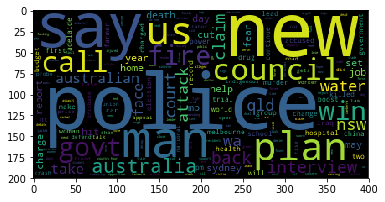

In [131]:
from wordcloud import WordCloud
wc=WordCloud().generate(' '.join(docs))
plt.imshow(wc)

### Cleaning the headlines

In [132]:
docs_clean=[]
stopwords=nltk.corpus.stopwords.words('english')
junk_words=['','say']
stopwords.extend(junk_words)
 
for doc in docs:
    row_words=[word for word in doc.split(' ') if word not in stopwords]
    docs_clean.append(row_words)

len(docs_clean)

10000

In [133]:
import gensim
dictionary=gensim.corpora.Dictionary(docs_clean)

In [134]:
docs_bow=[dictionary.doc2bow(doc) for doc in docs_clean]

### Taking n=4 topics

In [135]:
#take topics=4
ldamodel=gensim.models.LdaModel(docs_bow,id2word=dictionary,num_topics=4)
ldamodel

In [136]:
ldamodel.print_topics()

[(0,
  '0.007*"police" + 0.006*"crash" + 0.006*"new" + 0.005*"world" + 0.005*"cup" + 0.004*"water" + 0.004*"two" + 0.004*"melbourne" + 0.004*"win" + 0.003*"says"'),
 (1,
  '0.008*"police" + 0.008*"man" + 0.007*"new" + 0.005*"us" + 0.005*"council" + 0.004*"murder" + 0.004*"charged" + 0.004*"govt" + 0.003*"death" + 0.003*"market"'),
 (2,
  '0.008*"interview" + 0.004*"police" + 0.004*"minister" + 0.003*"council" + 0.003*"call" + 0.003*"plan" + 0.003*"national" + 0.003*"iraq" + 0.003*"qld" + 0.003*"nt"'),
 (3,
  '0.007*"man" + 0.007*"fire" + 0.006*"court" + 0.004*"us" + 0.003*"face" + 0.003*"attack" + 0.003*"missing" + 0.003*"teen" + 0.003*"trial" + 0.003*"hit"')]

In [137]:
topics=[]
for doc_bow in docs_bow:
    topic=pd.DataFrame(ldamodel.get_document_topics(doc_bow),columns=['topic','prob']).sort_values('prob').tail(1)['topic'].values[0]
    topics.append(topic)

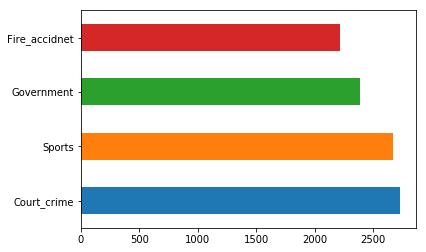

In [139]:
slice_abc['topic_number']=topics
slice_abc['topic']=slice_abc['topic_number'].replace({0:'Sports',1:'Court_crime',2:'Government',3:'Fire_accidnet'})
slice_abc['topic'].value_counts().plot.barh()

In [140]:
df_topic2word=pd.DataFrame()
for topic_number in range(4):
    df=pd.DataFrame(ldamodel.get_topic_terms(topic_number),columns=['wordid','prob'])
    df['word']=df['wordid'].apply(lambda v: dictionary[v])
    df['topic']=topic_number
    df_topic2word=df_topic2word.append(df,ignore_index=True)

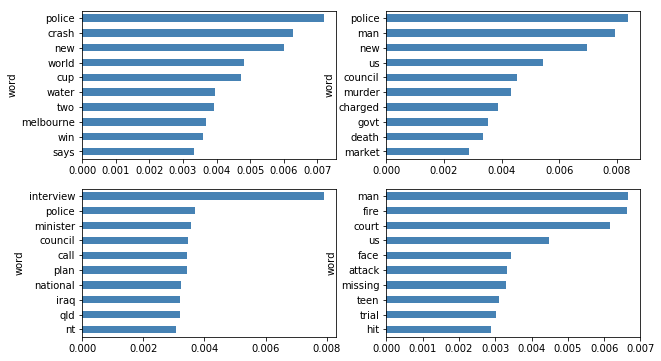

In [141]:
import matplotlib.pyplot as plt
df_topic2word.index=df_topic2word['word']
fig,axs=plt.subplots(2,2)
df_topic2word[df_topic2word['topic']==0]['prob'][::-1].plot.barh(color='steelblue',ax=axs[0,0],figsize=(10,6))
df_topic2word[df_topic2word['topic']==1]['prob'][::-1].plot.barh(color='steelblue',ax=axs[0,1],figsize=(10,6))
df_topic2word[df_topic2word['topic']==2]['prob'][::-1].plot.barh(color='steelblue',ax=axs[1,0],figsize=(10,6))
df_topic2word[df_topic2word['topic']==3]['prob'][::-1].plot.barh(color='steelblue',ax=axs[1,1],figsize=(10,6))


### lets take n=3 topics

In [142]:
ldamodel1=gensim.models.LdaModel(docs_bow,id2word=dictionary,num_topics=3)
ldamodel1

In [143]:
ldamodel1.print_topics()

[(0,
  '0.007*"police" + 0.005*"interview" + 0.004*"says" + 0.004*"new" + 0.004*"australian" + 0.004*"man" + 0.003*"water" + 0.003*"us" + 0.003*"killed" + 0.003*"nsw"'),
 (1,
  '0.006*"man" + 0.006*"police" + 0.005*"charged" + 0.005*"us" + 0.004*"fire" + 0.004*"crash" + 0.004*"murder" + 0.004*"new" + 0.003*"council" + 0.003*"child"'),
 (2,
  '0.004*"court" + 0.004*"new" + 0.004*"face" + 0.003*"council" + 0.003*"govt" + 0.003*"jailed" + 0.003*"plan" + 0.003*"world" + 0.003*"accused" + 0.003*"market"')]

In [144]:
topics=[]
for doc_bow in docs_bow:
    topic=pd.DataFrame(ldamodel1.get_document_topics(doc_bow),columns=['topic','prob']).sort_values('prob').tail(1)['topic'].values[0]
    topics.append(topic)

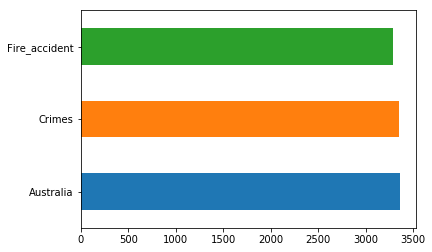

In [145]:
slice_abc['topic_number']=topics
slice_abc['topic']=slice_abc['topic_number'].replace({0:'Australia',1:'Fire_accident',2:'Crimes'})
slice_abc['topic'].value_counts().plot.barh()

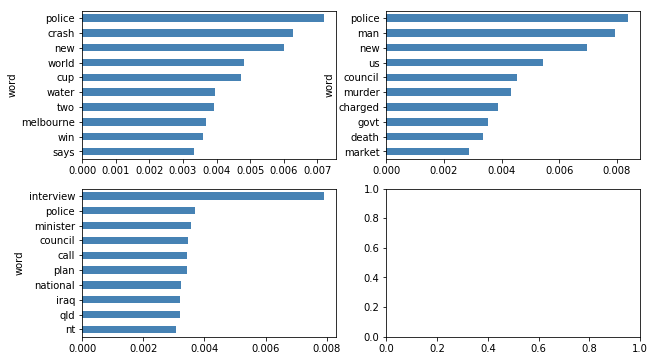

In [146]:
import matplotlib.pyplot as plt
df_topic2word.index=df_topic2word['word']
fig,axs=plt.subplots(2,2)
df_topic2word[df_topic2word['topic']==0]['prob'][::-1].plot.barh(color='steelblue',ax=axs[0,0],figsize=(10,6))
df_topic2word[df_topic2word['topic']==1]['prob'][::-1].plot.barh(color='steelblue',ax=axs[0,1],figsize=(10,6))
df_topic2word[df_topic2word['topic']==2]['prob'][::-1].plot.barh(color='steelblue',ax=axs[1,0],figsize=(10,6))
